In [34]:
%matplotlib inline
import torch
import random
from d2l import torch as d2l

In [35]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [36]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [37]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.5603, 0.3560]) 
label: tensor([4.1177])


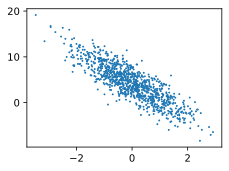

In [38]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [39]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # Randomly read the examples
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [40]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4516,  0.4922],
        [ 0.4203, -0.2606],
        [-0.6459, -0.9880],
        [-2.1381,  0.4230],
        [-1.5582, -1.2105],
        [ 1.7667,  0.6155],
        [ 0.2821,  1.3507],
        [ 0.9690,  0.7802],
        [ 0.6474,  0.1538],
        [-0.2085,  2.2337]]) 
 tensor([[ 3.4355],
        [ 5.9273],
        [ 6.2698],
        [-1.4947],
        [ 5.2082],
        [ 5.6483],
        [ 0.1812],
        [ 3.4981],
        [ 4.9633],
        [-3.7921]])


# A better approach

In [41]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [42]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [43]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [44]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.029472
epoch 2, loss 0.000103
epoch 3, loss 0.000052


In [45]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0010, -0.0009], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0003], grad_fn=<RsubBackward1>)
